In [1]:
%cd ../..
%run cryptolytic/notebooks/init.ipynb

/home/me/Documents/Git/Lambda-School-Labs/cryptolytic-ds
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import cryptolytic.util.core as util
import cryptolytic.start as start
import cryptolytic.viz.plot as plot
import cryptolytic.data.sql as sql
import cryptolytic.data.historical as h
import cryptolytic.model as m
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from matplotlib.pylab import rcParams
from IPython.core.display import HTML
from pandas.plotting import register_matplotlib_converters # to stop a warning message


ohclv = ['open', 'high', 'close', 'low', 'volume']
plt.style.use('ggplot')
rcParams['figure.figsize'] = 20,7
start.init()
register_matplotlib_converters()


# Make math readable
HTML("""
<style>
.MathJax {
    font-size: 2rem;
}
</style>""")

In [ ]:
"""
df = sql.get_some_candles(
    info={'start':1574368000, 'end':1579046400, 'exchange_id':'hitbtc',
          'trading_pair':'btc_usd', 'period':300}, n=5e4)
df2 = df.copy()  # mutable copy
train_test_pivot = int(len(df)*0.8)
df['diff'] = df['high'] - df['low']
"""

In [41]:
dfarb = sql.get_arb_signal({'start':1556668800, 'period':300, 'trading_pair':'eth_btc', 'exchange_id':'binance'})


In [42]:
dfarb.head()

,exchange,trading_pair,timestamp,period,arb_diff,arb_signal
datetime,,,,,,
2019-05-01 00:00:00,binance,eth_btc,1556668800,300.0,0.000004,0.014244
2019-05-01 00:05:00,binance,eth_btc,1556669100,300.0,-0.000006,-0.019719
2019-05-01 00:10:00,binance,eth_btc,1556669400,300.0,-0.000008,-0.027389
2019-05-01 00:15:00,binance,eth_btc,1556669700,300.0,0.000006,0.018521
2019-05-01 00:20:00,binance,eth_btc,1556670000,300.0,0.000014,0.045804


In [43]:
yo = m.denoise(dfarb.arb_signal, 20)

In [46]:
help(df.merge)

NameError: name 'df' is not defined

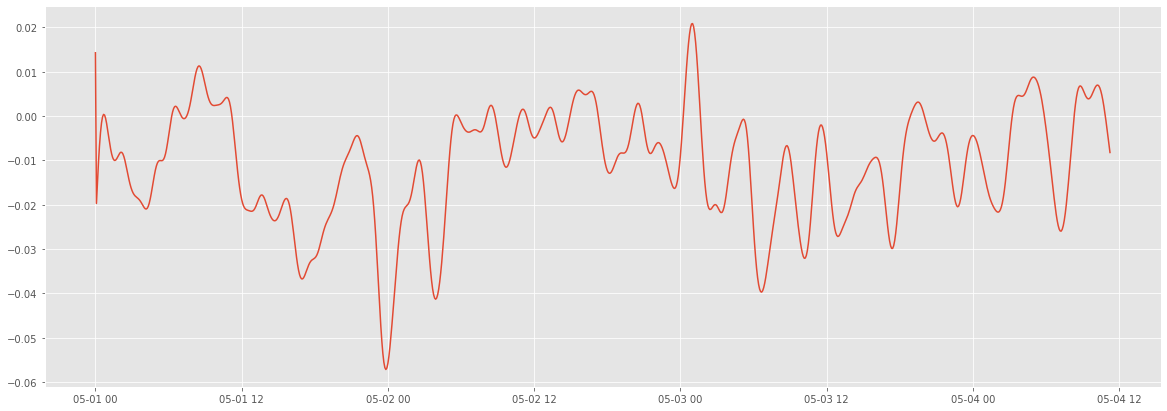

In [44]:
def plot_arbitration(df):
    fig, ax1 = plt.subplots()
    
    color = 'tab:red'
    ax1.set_ylabel('Data', color=color)
    ax1.plot(df.index, df.close, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Signal', color=color)  
    ax2.plot(dfarb.index,yo,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)


In [47]:
1577836800

1577836800